# Progetto n°5: Covid 3 

## Gruppo di lavoro

### Nome del gruppo: 

BugBusters

### Partecipanti

* Simone Tiberi (M. 0299908)
* Cristiano Cuffaro (M. 0299838)
* Alessandro Chillotti (M. 0299824)
* Marco Calavaro (M. 0295233)

## Scopo del progetto

Lo scopo del progetto è quello di realizzare dei grafici per mettere in risalto alcune caratteristiche del fenomeno Covid con cui tutto il mondo convive da più di un anno a questa parte.

A tale scopo sono state realizzate diverse funzioni, sia per la manipolazione dei dati "grezzi" di input provenienti da diverse sorgenti, sia per la realizzazione dei plot stessi.

## Svolgimento

### Fasi preliminari

Per lo sviluppo del progetto sono state adottate le seguenti librerie:
* **`pandas`** per la gestione di `dataframe` e `series`
* **`numpy`** per la manipolazione delle `series` (e.g. replace di valori, calcolo di logaritmi, ...)
* **`math`** per effettuare l'arrotondamento del numero di subplot da realizzare nella quinta richiesta
* **`pyplot`** (from **`matplotlib`**) per graficare dati
* **`datetime`** (from **`datetime`**) per la gestione delle date, principalmente in fase di salvataggio di dati e *json*
* **`os`** per la creazione della struttura di directory dove vengono memorizzati i grafici ed i dati estratti rispettivamente in formato `.svg` e `.json` 

Per motivi di pulizia del codice è stato deciso di fattorizzare all'inizio, in un'unica cella, gli import necessari.

In [ ]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from datetime import datetime
import os

Tramite il metodo `read_csv` di **`pandas`** sono stati creati i tre DataFrame "grezzi" a partire dai dati contenuti all'interno del file `.csv` della *Johns Hopkins University*

In [ ]:
site = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_%s_global.csv"
confirmed_url = site % "confirmed"
deaths_url = site % "deaths"
recovered_url = site % "recovered"

covid_confirmed = pd.read_csv(confirmed_url)
covid_deaths = pd.read_csv(deaths_url)
covid_recovered = pd.read_csv(recovered_url)

I DataFrame appena creati si presentano come mostrato di seguito:

In [ ]:
covid_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/24/22,9/25/22,9/26/22,9/27/22,9/28/22,9/29/22,9/30/22,10/1/22,10/2/22,10/3/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,198244,198416,198543,198750,198876,199067,199188,199310,199386,199545
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,331953,331976,331987,332066,332129,332173,332221,332263,332285,332290
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,270637,270641,270649,270654,270662,270668,270673,270676,270679,270682
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,46147,46147,46147,46147,46227,46227,46227,46227,46227,46227
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,103131,103131,103131,103131,103131,103131,103131,103131,103131,103131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,702768,702768,702768,702768,702768,702768,702768,702768,702768,702768
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11935,11935,11935,11935,11935,11935,11935,11935,11935,11935
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,333439,333439,333439,333503,333503,333531,333531,333549,333549,333555


In [ ]:
covid_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/24/22,9/25/22,9/26/22,9/27/22,9/28/22,9/29/22,9/30/22,10/1/22,10/2/22,10/3/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7796,7796,7798,7798,7799,7799,7800,7800,7801,7803
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3589,3589,3589,3589,3589,3589,3589,3589,3589,3589
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6879,6879,6879,6879,6879,6879,6879,6879,6879,6879
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,155,155,155,155,155,155,155,155,155,155
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5707,5707,5707,5707,5707,5707,5707,5707,5707,5707
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2157,2157,2157,2157,2157,2157,2157,2157,2157,2157
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4017,4017,4017,4017,4017,4017,4017,4017,4017,4017


In [ ]:
covid_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/24/22,9/25/22,9/26/22,9/27/22,9/28/22,9/29/22,9/30/22,10/1/22,10/2/22,10/3/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Trasformazione del dataframe

I passi per la trasformazione del DataFrame in quello richiesto dalla consegna sono di seguito riportati:

1. Tramite la funzione `sum_all_regions`  vengono generati nuovi DataFrame, a partire da quelli ottenuti al passo precedente aventi le seguenti caratteristiche:
    * Per ogni *Country* vi è un'unica `Series` ottenuta come somma di tutte le *Province* appartenenti ad essa 
    * L'insieme delle colonne non contiene "Province/State"
    * Il valore delle colonne "Lat" e "Long" è assegnato con il seguente criterio:    
        - se esiste una "Province/State" a valore NaN, il che implica la presenza di dati relativi alle colonie nel dataframe, le sue coordinate saranno assegnate all'intero *Country*
        - altrimenti, si prende direttamente il valore associato alla *Province* 0-esima

In [ ]:
def sum_all_regions(df, debug_str=None):
    """
    @param df: il dataframe sorgente per l'elaborazione
    @param debug_str: stampa di debug (default None)
    @return: nuovo dataframe
    """
    
    # stampa informativa gestita tramite parametro opzionale
    info = f" [DataFrame: '{debug_str}']" if debug_str is not None else ""  
    
    # estrapolate dal dataframe originale le colonne 
    # Province/State, Country/Region, Lat, Long
    coords_cols = df.columns[0:4].to_list()
    
    # estrapolate dal dataframe originale le colonne 
    # Country/Region, Lat, Long, data_1, ..., data_N
    significant_cols = df.columns[1:].to_list()
    
    # proiezioni del dataframe iniziali sui vari insiemi di colonne
    df_significant_proj = df[significant_cols]
    df_coords_proj = df[coords_cols]
    
    result_df = pd.DataFrame(columns=significant_cols)
    
    # estratto l'insieme dei valori della colonna del dataset tramite la funzione unique() 
    for country in df_significant_proj["Country/Region"].unique():
        print(f"Working on{info}: {country}")
        
        # somma dei dati relativi a ciascuna Province/State
        country_series = df_significant_proj[df_significant_proj["Country/Region"] == country].sum()
                
        # estrazione delle coordinate dei countries che hanno un valore di Pronvice/State pari a NaN
        coord_country = df_coords_proj[(df_coords_proj["Country/Region"] == country) & (df_coords_proj["Province/State"].isnull())]
        
        # se il country corrente ha un valore pari a NaN fra le Pronvice/State allora si considerano i relativi dati, altrimenti si fa la media
        if coord_country.shape[0] == 1:
            country_coords_series = coord_country.iloc[0]
        else:
            # [04/10/22] Aggiunto il flag numeric_only all'invocazione della media per evitare un FutureWarning
            country_coords_series = df_coords_proj[df_coords_proj["Country/Region"] == country].replace(0, np.nan).mean(numeric_only=True)     
        
        # merge dei risultati ottenuti
        country_series["Country/Region"] = country
        country_series["Lat"] = country_coords_series["Lat"]
        country_series["Long"] = country_coords_series["Long"]
        
        # append nel dataframe
        result_df = result_df.append(country_series, ignore_index=True)
    
    return result_df

2. Tramite la funzione `transform_df`, il risultato ottenuto da `sum_all_regions`, viene trasformato in un DataFrame conforme alle specifiche richieste, a cui andranno in seguito aggiunte le colonne *New Confirmed, New Deaths* e *New Recovered* (tramite la funzione `add_delta_column`).

In [ ]:
def transform_df(confirmed_src, deaths_src, recovered_src): 
    """
    @param confirmed_src: dataframe dei confermati
    @param deaths_src: dataframe delle morti
    @param recovered_src: dataframe dei guariti
    @return: nuovo dataframe
    """   
    
    
    # lista di dizionari utilizzati per creare al termine
    # dell'algoritmo il nuovo dataframe
    arr_for_df = []
    
    # numero di caratteri contenuti nella stringa che rappresenta
    # la lungezza del dataset originale (necessario per la formattazione
    # delle stampe di output)
    n_char_len_df = len(str(len(confirmed_src)))    
    
    for j in range(len(confirmed_src)):
        
        country_name = confirmed_src.iloc[j]["Country/Region"]
        country_lat = confirmed_src.iloc[j]["Lat"]
        country_long = confirmed_src.iloc[j]["Long"]
        
        # fattorizzato il calcolo della percentuale di completamento delle operazioni
        # per aumentare la leggibilita' del codice 
        percentage = ((j + 1) / len(confirmed_src)) * 100
        
        # stampe per effettuare un check sull'avanzamento dell'algoritmo
        print(f"Working on row {(j + 1):{''}{n_char_len_df}}/{len(confirmed_src)}"
              f" (Transformation completed at {percentage:6.02f}%)")
        
        for index, column in enumerate(confirmed_src.columns[3:]):
                mutable_fields = {}
            
                # setting dei valori "immutable" precedentemente valutati
                mutable_fields["Country/Region"] = country_name
                mutable_fields["Lat"] = country_lat
                mutable_fields["Long"] = country_long
                
                d_elems = column.split('/')
                
                # Trasformazione della data dal formato mm/dd/yy in yyyy-mm-dd (con gli zeri non significativi)
                date_iso = f"20{int(d_elems[2])}-{int(d_elems[0]):02d}-{int(d_elems[1]):02d}"
                
                # setting dei valori "mutable"
                mutable_fields["Date"] = date_iso
                mutable_fields["Confirmed"] = confirmed_src.iloc[j][column]
                mutable_fields["Deaths"] = deaths_src.iloc[j][column]
                mutable_fields["Recovered"] = recovered_src.iloc[j][column]
                
                # aggiunta della row al futuro dataframe corrispondente alla
                # colonna corrente
                arr_for_df.append(mutable_fields)
        
    # costruzione del dataframe a partire dalla lista di dizionari
    transformed_covid_df = pd.DataFrame.from_records(arr_for_df).reset_index(drop=True)
    
    # reordering del dataframe per regione e data
    transformed_covid_df = transformed_covid_df.sort_values(["Country/Region", "Date"])
    transformed_covid_df.rename(columns={"Country/Region": "Country"}, inplace=True)
    
    return transformed_covid_df 

3. Tramite la funzione `add_delta_column` vengono aggiunte le colonne mancanti al DataFrame, i cui valori sono ottenuti come segue: 

    \begin{equation}
      \text{NEW_COLUMN}_i =
        \begin{cases}
          \text{OLD_COLUMN}_i \ - \text{OLD_COLUMN}_{i-1} & \text{se i > 0}\\
          NaN & \text{altrimenti}\\
        \end{cases}       
    \end{equation}

    A tale scopo viene adottata la funzione qui sotto riportata `conditional_diff`, invocata automaticamente da **`pandas`** nel costrutto `rolling(window=w).apply(f)`.

In [ ]:
def conditional_diff(x):
    """
    @param serie di due valori su cui calcolare la differenza
    @return: differenza se x_1 >= x_0, NaN altrimenti
    """
    return x.iloc[1] - x.iloc[0] if x.iloc[1] >= x.iloc[0] else np.nan

In [ ]:
def add_delta_column(source_column, target_column, target_df):
    """
    @param source_column: colonna sorgente
    @param target_column: nuova colonna da create
    @param target_df: dataframe di riferimento
    """ 
    
    source_cases = target_df[source_column]
    target_cases = source_cases.rolling(window=2).apply(conditional_diff)
    target_df[target_column] = target_cases

4. Tramite la funzione `create_results_folder` viene creata la gerarchia di directory di seguito riportata per la memorizzazione dell'output del progetto:
    - **`results/`**: root folder
    - **`results/yyyy_mm_dd/`**: cartelle ad hoc per ciascuna data contenenti:
        - il `.json` del dataframe generato
        - le immagini in formato `.svg` dei grafici prodotti

In [ ]:
def create_results_folder():
    if not os.path.isdir("./results"):
        os.mkdir("./results")
        print("*** Results folder created ***")
    if not os.path.isdir(f"./results/{datetime.today().strftime('%Y_%m_%d')}"):
        os.mkdir(f"./results/{datetime.today().strftime('%Y_%m_%d')}")
        print(f"*** Current day folder (results/{datetime.today().strftime('%Y_%m_%d')}/) created ***")

5. Infine `generate_df` invoca le funzioni precedentemente analizzate per automatizzare il processo di costruzione del DataFrame desiderato:

In [ ]:
def generate_df(confirmed_src, deaths_src, recovered_src, save_to_file=True):
    """
    @param confirmed_src: dataframe dei confermati
    @param deaths_src: dataframe delle morti
    @param recovered_src: dataframe dei guariti
    @param save_to_file: se True allora salva il dataframe su file (default True)
    @return: dataframe richiesto
    """  
    
    print("*** Sum of the rows related to the same 'Country/Region' ***\n")
    confirmed_sum = sum_all_regions(confirmed_src, debug_str="covid_confirmed")
    deaths_sum = sum_all_regions(deaths_src, debug_str="covid_deaths")
    recovered_sum = sum_all_regions(recovered_src, debug_str="covid_recovered")
    
    print("\n\n*** Dataframe transformation ***\n")
    covid_data = transform_df(confirmed_sum, deaths_sum, recovered_sum)
    
    print("\n\n *** Adding the remaining columns ***\n")
    add_delta_column("Confirmed", "New Confirmed", covid_data)
    add_delta_column("Deaths", "New Deaths", covid_data)
    add_delta_column("Recovered", "New Recovered", covid_data)
    
    # se il flag save_to_file vale True memorizza su disco il dataframe creato
    if save_to_file:
        try:
            path = f"results/{datetime.today().strftime('%Y_%m_%d')}/covid_data.json"
            covid_data.to_json(path, orient="records", indent=2)
            print("Dataframe succesfully stored!")
        except:
            print("Destination folder does not exist. Please run create_results_folder first")
    
    return covid_data

Il risultato della fase di trasformazione del dataframe è di seguito mostrato:

In [ ]:
create_results_folder()

covid_data = generate_df(covid_confirmed, covid_deaths, covid_recovered)
covid_data

*** Sum of the rows related to the same 'Country/Region' ***

Working on [DataFrame: 'covid_confirmed']: Afghanistan
Working on [DataFrame: 'covid_confirmed']: Albania
Working on [DataFrame: 'covid_confirmed']: Algeria
Working on [DataFrame: 'covid_confirmed']: Andorra
Working on [DataFrame: 'covid_confirmed']: Angola
Working on [DataFrame: 'covid_confirmed']: Antarctica
Working on [DataFrame: 'covid_confirmed']: Antigua and Barbuda
Working on [DataFrame: 'covid_confirmed']: Argentina
Working on [DataFrame: 'covid_confirmed']: Armenia
Working on [DataFrame: 'covid_confirmed']: Australia
Working on [DataFrame: 'covid_confirmed']: Austria
Working on [DataFrame: 'covid_confirmed']: Azerbaijan
Working on [DataFrame: 'covid_confirmed']: Bahamas
Working on [DataFrame: 'covid_confirmed']: Bahrain
Working on [DataFrame: 'covid_confirmed']: Bangladesh
Working on [DataFrame: 'covid_confirmed']: Barbados
Working on [DataFrame: 'covid_confirmed']: Belarus
Working on [DataFrame: 'covid_confirmed']:

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,New Confirmed,New Deaths,New Recovered
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,NaN,NaN,NaN
1,Afghanistan,33.939110,67.709953,2020-01-23,0,0,0,0.0,0.0,0.0
2,Afghanistan,33.939110,67.709953,2020-01-24,0,0,0,0.0,0.0,0.0
3,Afghanistan,33.939110,67.709953,2020-01-25,0,0,0,0.0,0.0,0.0
4,Afghanistan,33.939110,67.709953,2020-01-26,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
198181,Zimbabwe,-19.015438,29.154857,2022-09-29,257409,5602,0,0.0,0.0,0.0
198182,Zimbabwe,-19.015438,29.154857,2022-09-30,257465,5602,0,56.0,0.0,0.0
198183,Zimbabwe,-19.015438,29.154857,2022-10-01,257465,5602,0,0.0,0.0,0.0
198184,Zimbabwe,-19.015438,29.154857,2022-10-02,257517,5602,0,52.0,0.0,0.0


### Funzioni richieste

`save_plot` e `check_date_format` sono due funzioni di utility invocate in diversi punti del codice sottostante. In particolare:
* tramite `save_plot` viene automatizzato il processo di salvataggio dei plot in formato `svg` nella cartella corretta
* `check_data_format` viene invece adottata negli assert per valutare la correttezza delle date passate come parametri attuali 

In [ ]:
def save_plot(file_name, image_format="svg"):
    """
    @param file_name: nome del file per il salvataggio
    @param image_format: formato di salvataggio (default svg)
    """
    
    assert image_format in list(plt.gcf().canvas.get_supported_filetypes().keys()), "File format not supported"
    
    try:
        plt.savefig(f"results/{datetime.today().strftime('%Y_%m_%d')}/{file_name}.{image_format}")
    except:
        print("Destination folder does not exist. Please run create_results_folder first")

In [ ]:
def check_date_format(date):
    """
    @param date: data da convalidare
    @return: risultato del check
    """     
    
    try:
        datetime.strptime(date, "%Y-%m-%d")
        return True
    except ValueError:
        return False

#### 1. Graficare, per Paese dato, l’andamento di: New Confirmed, New Deaths, New Recovered

Questa funzione prende in input il dataframe e un Paese di cui si è interessati a graficare l'andamento dei dati e ne restituisce un grafico. 

È stata inoltre aggiunta la possibilità di poter specificare una data iniziale diversa dalla prima presente nel dataframe, nel caso in cui si voglia dare maggiore enfasi alla porzione di dati recente.

In [ ]:
def plot_progress (covid_data,country,start_date=None,ticks_interval=10,save_to_file=True):
    """
    @param covid_data: dataframe sorgente
    @param country: Paese del quale si vuole scoprire l'andamento
    @param start_date: data iniziale (default None)
    @param ticks_interval: intervallo tra una label e la successiva nel grafico (default 10)
    @param save_to_file: se True salva il grafico in formato .svg (default True)
    """
    # per motivi di resa grafica si limita la scelta dell'ampiezza degli intervalli sull'asse x dai 3 ai 30 giorni
    assert ticks_interval in range(3, 31), "Interval between dates must be in range [3, 30]"

    # estrazione del DataFrame in base alla country
    country_condition = covid_data["Country"]==country
    if start_date is not None:
        assert check_date_format(start_date), "Start date format not supported. Please use: yyyy-mm-dd."
        date_condition = covid_data["Date"] >= start_date
    else:
        date_condition = True
        
    tmp = covid_data[country_condition & date_condition]
    
    assert len(tmp) != 0, "There are not any data to be plotted for the selected Country."
    
    # estrazione delle date 
    date_list = tmp["Date"]
 
    # preparazione valori asse x
    date_len = len(date_list) 
    date_label = date_list.iloc[::ticks_interval]
    date_position = np.arange(0, date_len, step=ticks_interval)
 
    plt.figure(figsize = (16,9))
 
    # preparazione del plot 
    plt.plot(date_list,tmp["New Confirmed"],'b',label = 'New Confirmed')
    plt.plot(date_list,tmp["New Deaths"],'y',label = 'New Deaths')
    plt.plot(date_list,tmp["New Recovered"],'r',label = 'New Recovered')
 
    # completamento dati del plot
    plt.title(f"Progress of: {country}")
    plt.ylabel("Value")
    plt.xlabel("Date")
    plt.xticks(date_position, date_label, rotation=45)
    plt.legend(loc='upper left',fontsize='xx-large')
 
    #salvataggio del file
    if save_to_file:
        save_plot(f"progress_of_{country}")
 
    # show
    plt.show()

Di seguito sono proposte 2 demo differenti:
1. Grafico su tutte le date
2. Grafico a partire dalla data specificata 

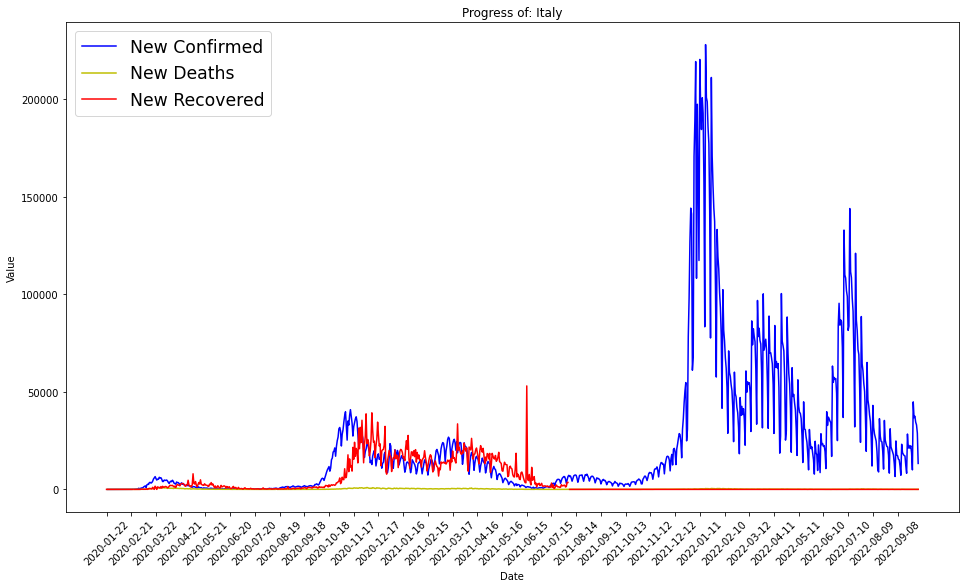

In [ ]:
plot_progress(covid_data,"Italy", ticks_interval=30)

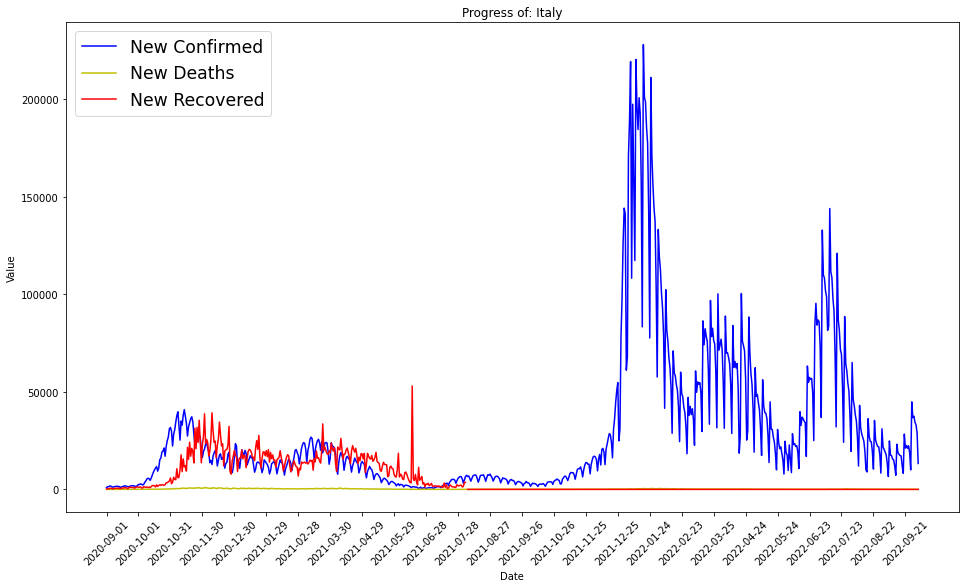

In [ ]:
plot_progress(covid_data,"Italy", "2020-09-01", ticks_interval=30)

#### 2. Graficare l'andamento globale di "New Deaths" in un intervallo di date

Questa funzione prende in input il dataframe e gli estremi dell'intervallo di date di interesse e produce un grafico relativo alle nuove morti.

È possibile inoltre specificare un elenco di *Countries* mediante `varargs` per produrre un ulteriore subplot in cui viene presentato un confronto tra di essi sempre relativamente alle nuove morti nell'intervallo di date di interesse.

In [ ]:
def new_deaths_trend(source_df, start, end, *countries, ticks_interval=10, save_to_file=True):
    """
    @param source_df: dataframe da cui prelevare i dati
    @param start: estremo sinistro dell'intervallo delle date
    @param end: estremo destro dell'intervallo delle date
    @param countries: elenco dei Country di interesse
    @param ticks_interval: intervallo tra una label e la successiva nel grafico (default 10)
    @param save_to_file: se True salva il grafico in formato .svg (default True)
    """   
    
    # si verifica che le date rispettino il formato ISO
    assert check_date_format(start), "Start date format not supported. Please use: yyyy-mm-dd."
    assert check_date_format(end), "End date format not supported. Please use: yyyy-mm-dd."
    
    # verifica esistenza dei countries specificati
    if len(countries) > 0:
        list_of_countries = source_df["Country"].unique()
        for country in countries:
            assert country in list_of_countries, f"There are not any data to be plotted for '{country}'." 
    
    # per motivi di resa grafica si limita la scelta dell'ampiezza degli intervalli sull'asse x dai 3 ai 30 giorni
    assert ticks_interval in range(3, 31), "Interval between dates must be in range [3, 30]"    
    
    # effettuato uno slicing del dataframe sulle sole date di interesse
    selected_df = source_df[(source_df["Date"] >= start) & (source_df["Date"] <= end)]
    
    # si verifica vi siano dati da presentare
    assert len(selected_df) != 0, "There are not any data to be plotted for the selected interval of dates."

    # lista delle date da graficare
    days = selected_df["Date"].unique()
    
    # per i dati globali si costruisce una serie pandas (tipo di dato: float64) contenente i dati aggregati
    world_nd = pd.Series(dtype="float64")
    for day in days:
        world_nd[day] = selected_df[selected_df["Date"] == day].sum()["New Deaths"]
    
    # se non sono stati specificati paesi si grafica soltanto l'andamento globale
    if len(countries) == 0:
        plt.figure(figsize=(16,9))
        
        # annotazione sul massimo numero di nuovi morti registrato
        plt.annotate(
            f"Max number of deaths: {int(world_nd.max())}\nregistered on: {world_nd.idxmax()}",
            xy = (world_nd.idxmax(), world_nd.max()), 
            xycoords='data',
            arrowprops = {'arrowstyle' : '->', 'color' : 'red'},
            ha='center',
            xytext=(int(len(days)/2), int(world_nd.max()*0.75)),
            color='red'
        )
        
        # plot dei dati aggregati del mondo
        plt.plot(days, world_nd, label="World")        
        
        # setting dei parametri del grafico
        plt.title("Global trend of new deaths")
        plt.xticks(range(0,len(days), ticks_interval), days[::ticks_interval], rotation=45)
        plt.xlabel(f"Dates from {start} to {end} ({len(days)} days)")
        plt.ylabel("Number of deaths")
        plt.legend(loc='upper left', fontsize='xx-large')
       
    # altrimenti si grafica un confronto tra i dati aggregati e quelli dei singoli paesi
    else:
        
        # altezza doppia rispetto al caso precedente per avere due grafici in 16:9
        fig, axs = plt.subplots(2, figsize=(16,18), constrained_layout=True)
        
        # plot dei due grafici (in 0 quello dei dati aggregati in 1 quello dei singoli paesi)
        axs[0].plot(days, world_nd, label="World")
        
        for country in countries:
            country_data = selected_df[selected_df["Country"] == country]
            axs[1].plot(days, country_data["New Deaths"], label=country)

        # setting dei parametri dei due grafici
        axs[0].set_title("Global trend of new deaths")
        axs[1].set_title("Selected country trend of new deaths")
        
        # annotazione sul massimo numero di nuovi morti registrato
        axs[0].annotate(
            f"Max number of deaths: {int(world_nd.max())}\nregistered on: {world_nd.idxmax()}",
            xy = (world_nd.idxmax(), world_nd.max()), 
            xycoords='data',
            arrowprops = {'arrowstyle' : '->', 'color' : 'red'},
            ha='center',
            xytext=(int(len(days)/2), int(world_nd.max()*0.75)),
            color='red'
        )
                
        for ax in axs:
            # setting dei parametri dei due grafici
            ax.set_xlabel(f"Dates from {start} to {end} ({len(days)} days)")
            ax.set_ylabel("Number of deaths")
            ax.set_xticks(range(0,len(days), ticks_interval))
            ax.set_xticklabels(days[::ticks_interval], rotation=45)
            ax.legend(loc='upper left', fontsize='xx-large')
    
        
    if save_to_file:
        # il filename nel caso in cui non sono stati specificati paesi e': new_deaths_trend
        # altrimenti viene aggiunta come suffisso la stringa "_of_" seguita da tante sigle di 3
        # lettere maiuscole per identificare i vari paesi nel grafico
        filename = f"new_deaths_trend_from_{start}_to_{end}"
        
        if len(countries) > 0:
            filename = f"{filename}_of"
            for country in countries:
                filename = f"{filename}_{country[:3].upper()}"
            
        save_plot(filename) 
        
    plt.show()

Di seguito sono proposte 2 demo differenti:
1. Dati relativi al mondo
2. Dati relativi al mondo e ad alcuni stati

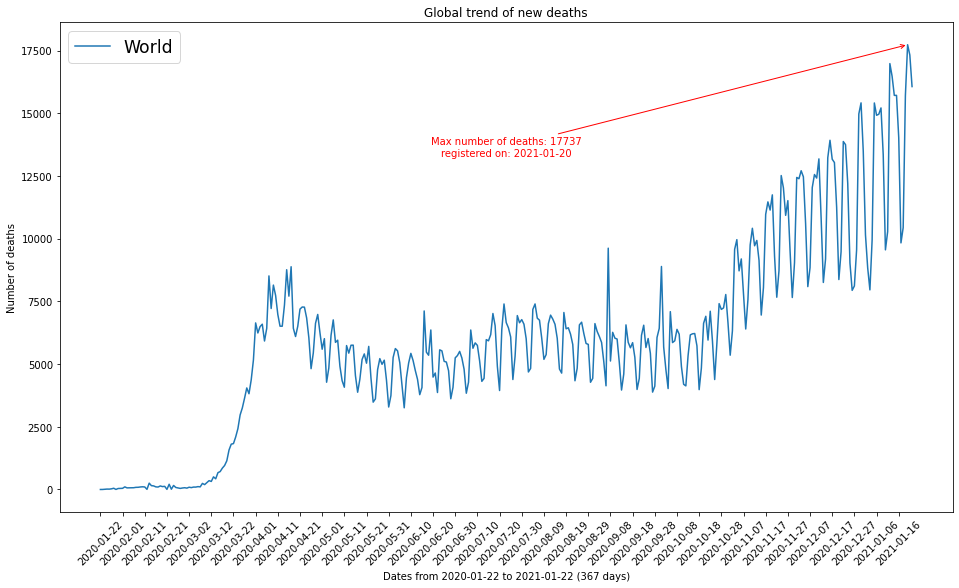

In [ ]:
new_deaths_trend(covid_data, "2020-01-22", "2021-01-22")

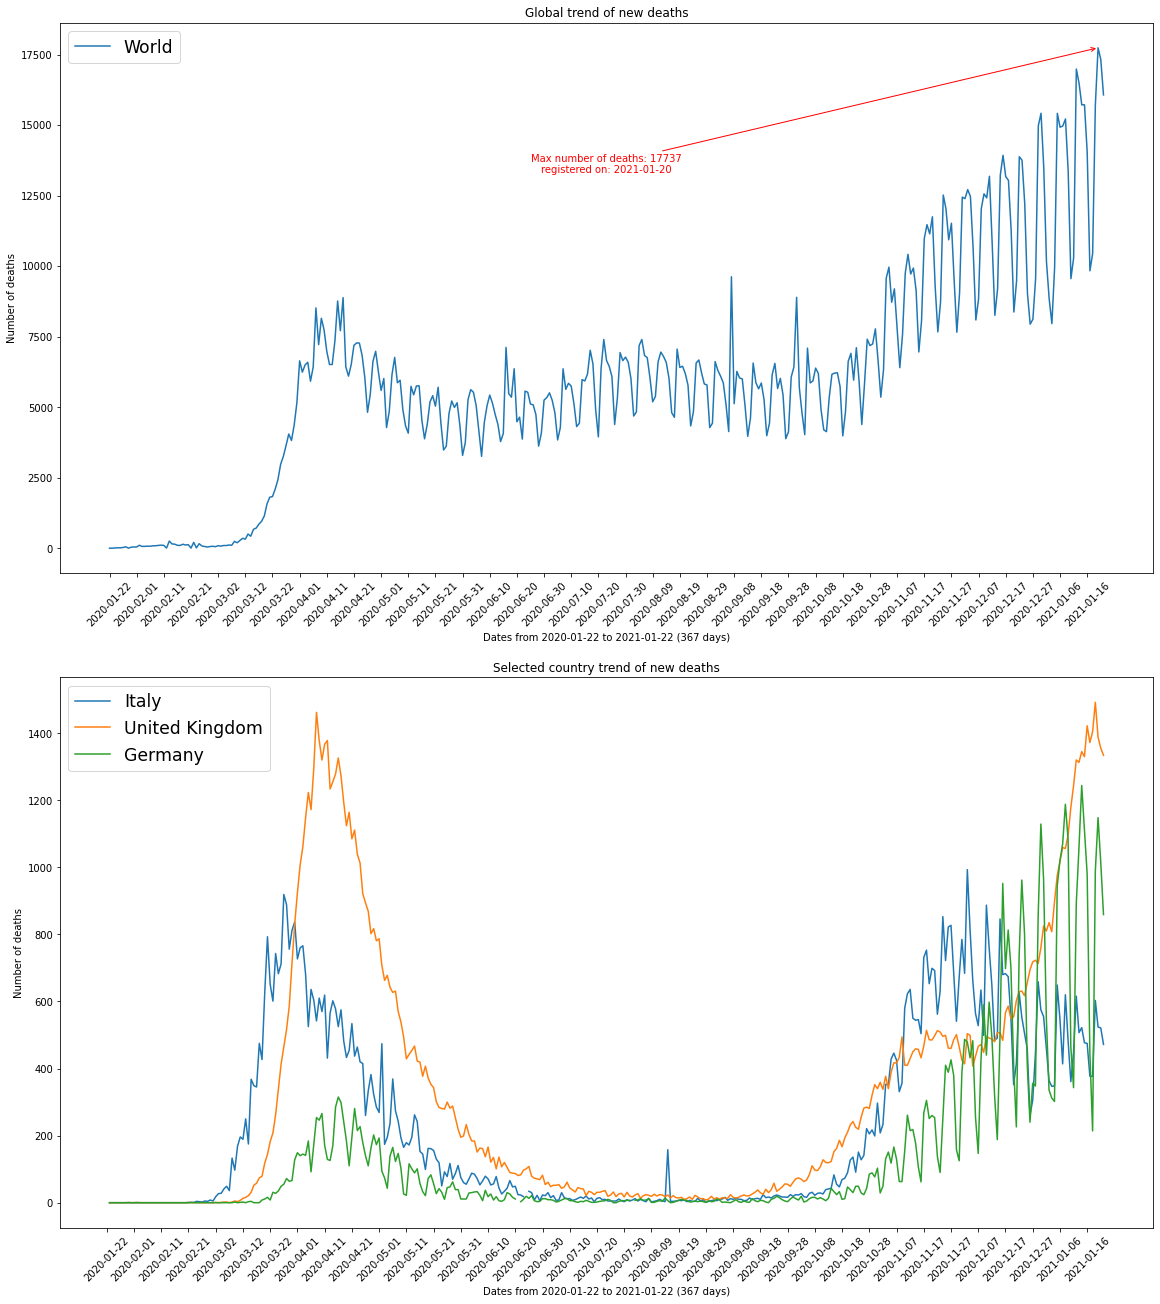

In [ ]:
new_deaths_trend(covid_data, "2020-01-22", "2021-01-22", "Italy", "United Kingdom", "Germany")

#### 3. Costruire uno scatter plot della situazione mondiale ad una data assegnata

Questa funzione prende in input il dataframe, la data di interesse e la caratteristica da graficare e produce uno scatter plot della situazione mondiale relativo ad essa.

Le caratteristiche richieste dalla traccia sono:
* Confirmed
* Deaths
* Recovered

A queste è stata aggiunta "Current confirmed" computata a runtime nel modo seguente: $CC_i = C_i - R_i - D_i$, per mettere in risalto la statistica relativa agli attuali positivi.

In [ ]:
def world_scatter_plot(covid_data, parameter, date, save_to_file=True, factor_scale=2000):
    """
    @param covid_data: dataframe sorgente
    @param parameter: parametro viene considerato per costruire lo scatter plot
    @param date: data dei valori da considerare per costruire lo scatter plot
    @param save_to_file: se True allora salva il grafico come immagine di formato .svg (default True)
    @param factor_scale: fattore di scala con cui rappresenta l'indice su cui si effettua lo scatter plot (default 2000)
    """ 
    
    assert parameter in ["Current Confirmed", "Confirmed", "Deaths", "Recovered"], "Inserted parameter cannot be plotted."
    assert check_date_format(date), "Date format not supported. Please use: yyyy-mm-dd."
    
    value_date = covid_data[covid_data["Date"] == date]
   
    # si verifica se sono presenti dati da graficare
    assert value_date.shape[0] != 0, "There are not any data to be plotted for the selected date."

    # se richiesti gli attuali positivi, essi vengono calcolati
    if parameter == "Current Confirmed": 
        value_parameter = value_date["Confirmed"] - value_date["Deaths"] - value_date["Recovered"]
    else:
        value_parameter = value_date[parameter]

    # vengono normalizzate i valori rispetto al valore massimo dell'insieme e moltiplicati per il fattore di scala
    normalized_value = factor_scale * value_parameter / max(value_parameter)

    plt.figure(figsize=(16,9))

    plt.title(f"Global situation of {parameter.lower()} cases in date {date}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    plt.scatter(value_date["Long"], value_date["Lat"], s = normalized_value) 

    for i in range(0, value_date.shape[0]):
        if value_parameter.iloc[i] >= max(value_parameter)/4:
            plt.annotate(value_date["Country"].iloc[i], xy=(value_date["Long"].iloc[i], value_date["Lat"].iloc[i]), color='black')

    # se il flag save_to_file vale True salva come immagine il grafico realizzato
    if save_to_file:
        save_plot(f"scatter_plot_{parameter.lower().replace(' ','_')}_{date}")

    plt.show()

Di seguito è proposta una demo di questa funzione:

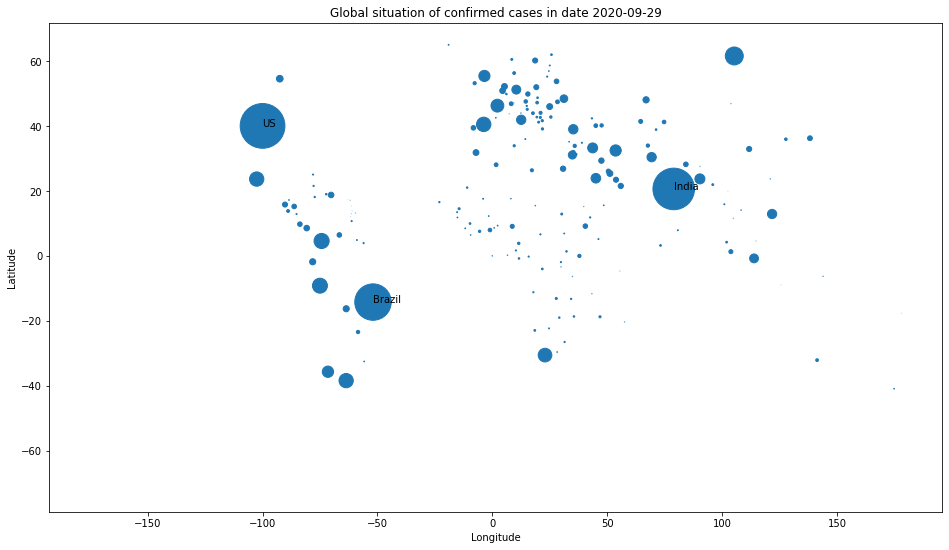

In [ ]:
world_scatter_plot(covid_data, "Confirmed", "2020-09-29")

#### 4. Costruire e graficare le medie mobili a: 7, 14, 21, 28 giorni

Questa funzione prende in input il DataFrame, la caratteristica da graficare e un intervallo di giorni (7, 14, 21, 28) e produce un plot della media mobile.

Tramite il meccanismo dei `varargs` è possibile specificare un elenco di *Countries* per la realizzazione del grafico. Se quest'ultimo è vuoto, viene plottata la situazione mondiale.

Per calcolare la media mobile vengono considerati i dati di un determinato periodo e ne viene calcolata la media sommandoli fra loro e dividendo per il numero totale di valori.

In [ ]:
def moving_mean(df, target_column, days, *countries, ticks_interval=10, save_to_file=True):
    """
    @param df: dataframe di lavoro
    @param target_column: colonna di cui si vuole graficare l'andamento
    @param days: numero di giorni su cui calcolare la media mobile
    @param *countries: zero o più countries per applicare un filtraggio dei dati
    @param ticks_interval: intervallo desiderato tra le date graficate (default 10)
    @param save_to_file: se True allora salva il dataframe su file (default True)
    """ 
    # verifica correttezza parametri di input
    assert days in [7, 14, 21, 28], "Number of days for moving mean must be 7, 14, 21 or 28"
    assert target_column in ["New Deaths", "New Recovered", "New Confirmed"], "Moving mean can be computed only relative to New Deaths, New Recovered or New Confirmed"
    assert ticks_interval in range(3, 31), "Interval between dates must be in range [3, 30]"
    
    # verifica esistenza dei countries specificati
    if len(countries) > 0:
        list_of_countries = df["Country"].unique()
        for country in countries:
            assert country in list_of_countries, f"There are not any data to be plotted for '{country}'."
    
    plt.figure(figsize=(16,9))
    xt = df["Date"].unique()
    
    if len(countries) == 0:
        # definizione dataframe con dati aggregati a livello mondiale
        new_cols = ["Date", target_column]
        df_new_cols = df[new_cols]
        ndf = pd.DataFrame(columns=new_cols)
        
        # somma dei dati di ogni Country per ciascuna Date
        for date in xt:
            # somma dei dati relativi ad una specifica Date
            date_series = df_new_cols[df_new_cols["Date"] == date].sum()

            # merge dei risultati ottenuti
            date_series["Date"] = date
    
            # append nel dataframe
            ndf = ndf.append(date_series, ignore_index=True)
        
        # calcolo della media mobile
        plt.plot(ndf["Date"], ndf[target_column].rolling(window=days, min_periods=1).mean(), label="World")
    else:
        # calcolo della media mobile per ciascun Country specificato
        for country in countries:
            ndf = df[df["Country"] == country]
            plt.plot(ndf["Date"], ndf[target_column].rolling(window=days, min_periods=1).mean(), label=country)
            
    # setting dei ticks e delle labels del grafico
    today = datetime.today().strftime('%Y_%m_%d')
    tgt = target_column.lower()
    plt.title(f"{days}-days moving mean of {tgt}")
    plt.xticks(range(0, len(xt), ticks_interval), xt[::ticks_interval], rotation=45)
    plt.xlabel(f"Temporal axis: dates from 2020-01-22 to {today} ({len(xt)} days)")
    plt.ylabel(f"Number of {tgt}")
    plt.legend(loc='upper left', fontsize='xx-large')
    
    if save_to_file:
        save_plot(moving_mean.__name__)
        
    plt.show()

Di seguito sono proposte 2 demo differenti:
1. Dati relativi al mondo
2. Dati relativi ad alcuni stati

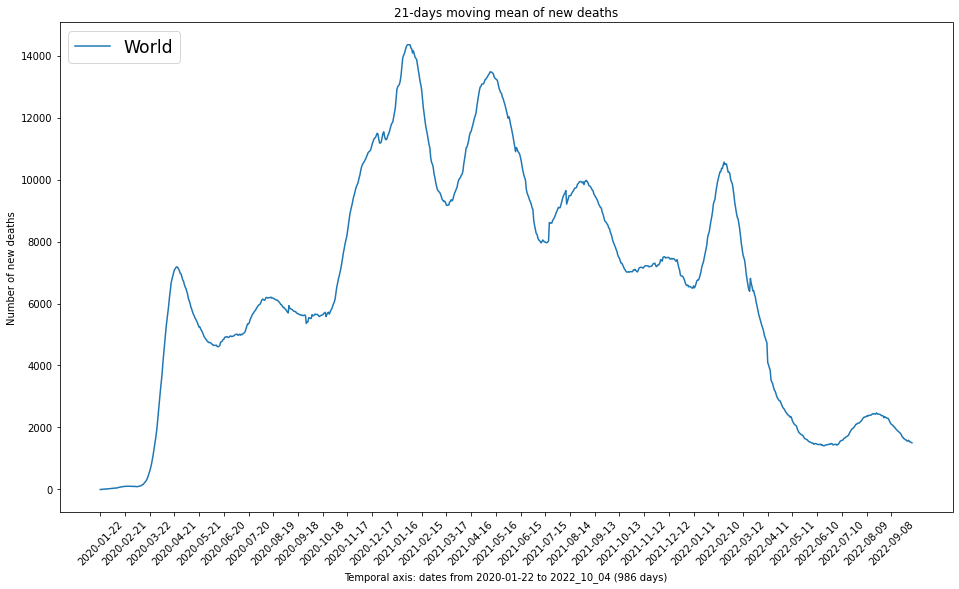

In [ ]:
moving_mean(covid_data, "New Deaths", 21, ticks_interval=30)

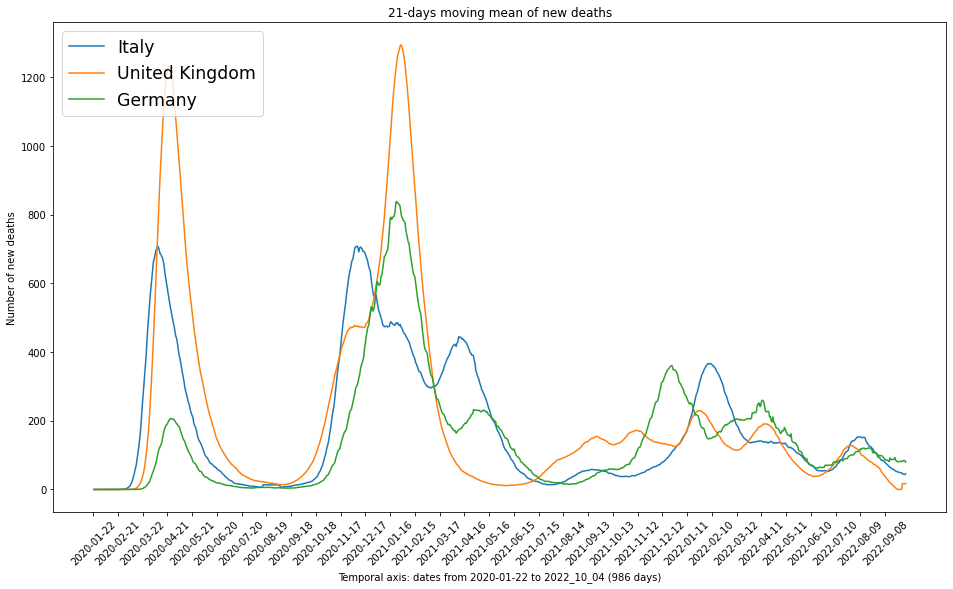

In [ ]:
moving_mean(covid_data, "New Deaths", 21, "Italy", "United Kingdom", "Germany", ticks_interval=30)

#### 5. Graficare a barre per tutti i paesi: New Confirmed, New Deaths e New Recovered di una data assegnata

Questa funzione prende in input il DataFrame e una data di interesse e produce un diagramma a barre relativo alle colonne New Confirmed, New Deaths e New Recovered. 

Per fruire al meglio del grafico è stato scelto di scomporlo in diversi subplot, ciascuno dei quali contenenti un numero di Paesi $\leq 48$. Una rappresentazione della situazione globale all'interno dello stesso grafico avrebbe reso complessa l'analisi del risultato prodotto.

Per ovviare al problema che sorge nella rappresentazione di un insieme di dati a varianza elevata, in cui le differenze tra valori estremi vengono ignorate e le proporzioni non vengono graficamente percepite, è stata adottata una scala di rappresentazione logaritmica.

In [ ]:
def plot_bar_progress(covid_data, date, save_to_file=True):
    """
    @param covid_data: dataframe di lavoro
    @param date: data dei valori da considerare per costruire il bar plot
    @param save_to_file: se True allora salva il dataframe su file (default True)
    """
    
    # verifica della correttezza del formato della data presa in input
    assert check_date_format(date), "Date format not supported. Please use: yyyy-mm-dd."
    
    # dimensione delle barre nel grafico
    bar_width = 0.2
    
    # numero di paesi per ciascun subplot
    size = 48 
    
    # dati di interesse (relativi alla data inserita)
    current_day_data = covid_data[covid_data["Date"] == date]
    
    #numero di subplots
    number_of_subplots = math.floor(len(current_day_data) / size)
    
    # costruzione del sublot
    fig, axs = plt.subplots(number_of_subplots, figsize=(64,18*number_of_subplots), constrained_layout=True)

    for i in range(number_of_subplots):
        
        # estrazione dei dati di interesse
        part_of_data = current_day_data.iloc[i*size:(i + 1)*size]
        countries = part_of_data["Country"]
        bins = np.arange(len(countries))
        
        with np.errstate(divide='ignore'):
            conf_series = np.log(part_of_data["New Confirmed"]) 
            deaths_series = np.log(part_of_data["New Deaths"])  
            rec_series = np.log(part_of_data["New Recovered"])
        
        # plot dei dati
        axs[i].bar(bins - bar_width, conf_series, bar_width, label='New Confirmed')
        axs[i].bar(bins, deaths_series, bar_width, label='New Deaths')
        axs[i].bar(bins + bar_width, rec_series, bar_width, label='New Recovered')
        
        # tuning dei parametri del grafico
        axs[i].set_title(f'From {countries.iloc[0]} to {countries.iloc[size-1]}')
        axs[i].set_xticks(range(0,size))
        axs[i].set_xticklabels(countries.iloc[:size], rotation=90)
        axs[i].legend(loc='upper left', fontsize='xx-large')
        axs[i].set_yscale('log')
        axs[i].grid(b=True, which='major', color='b', linestyle='-')
        axs[i].grid(b=True, which='minor', color='r', linestyle='--')
        axs[i].set_xlabel("Countries")      
        axs[i].set_ylabel("Number of 'New Confirmed' 'New Deaths' and 'New Recovered' on log10 scale")
            
    if save_to_file:
        save_plot(f"bar_progress_plot_{date}")
        
    plt.show()

Di seguito è proposta una demo di questa funzione:

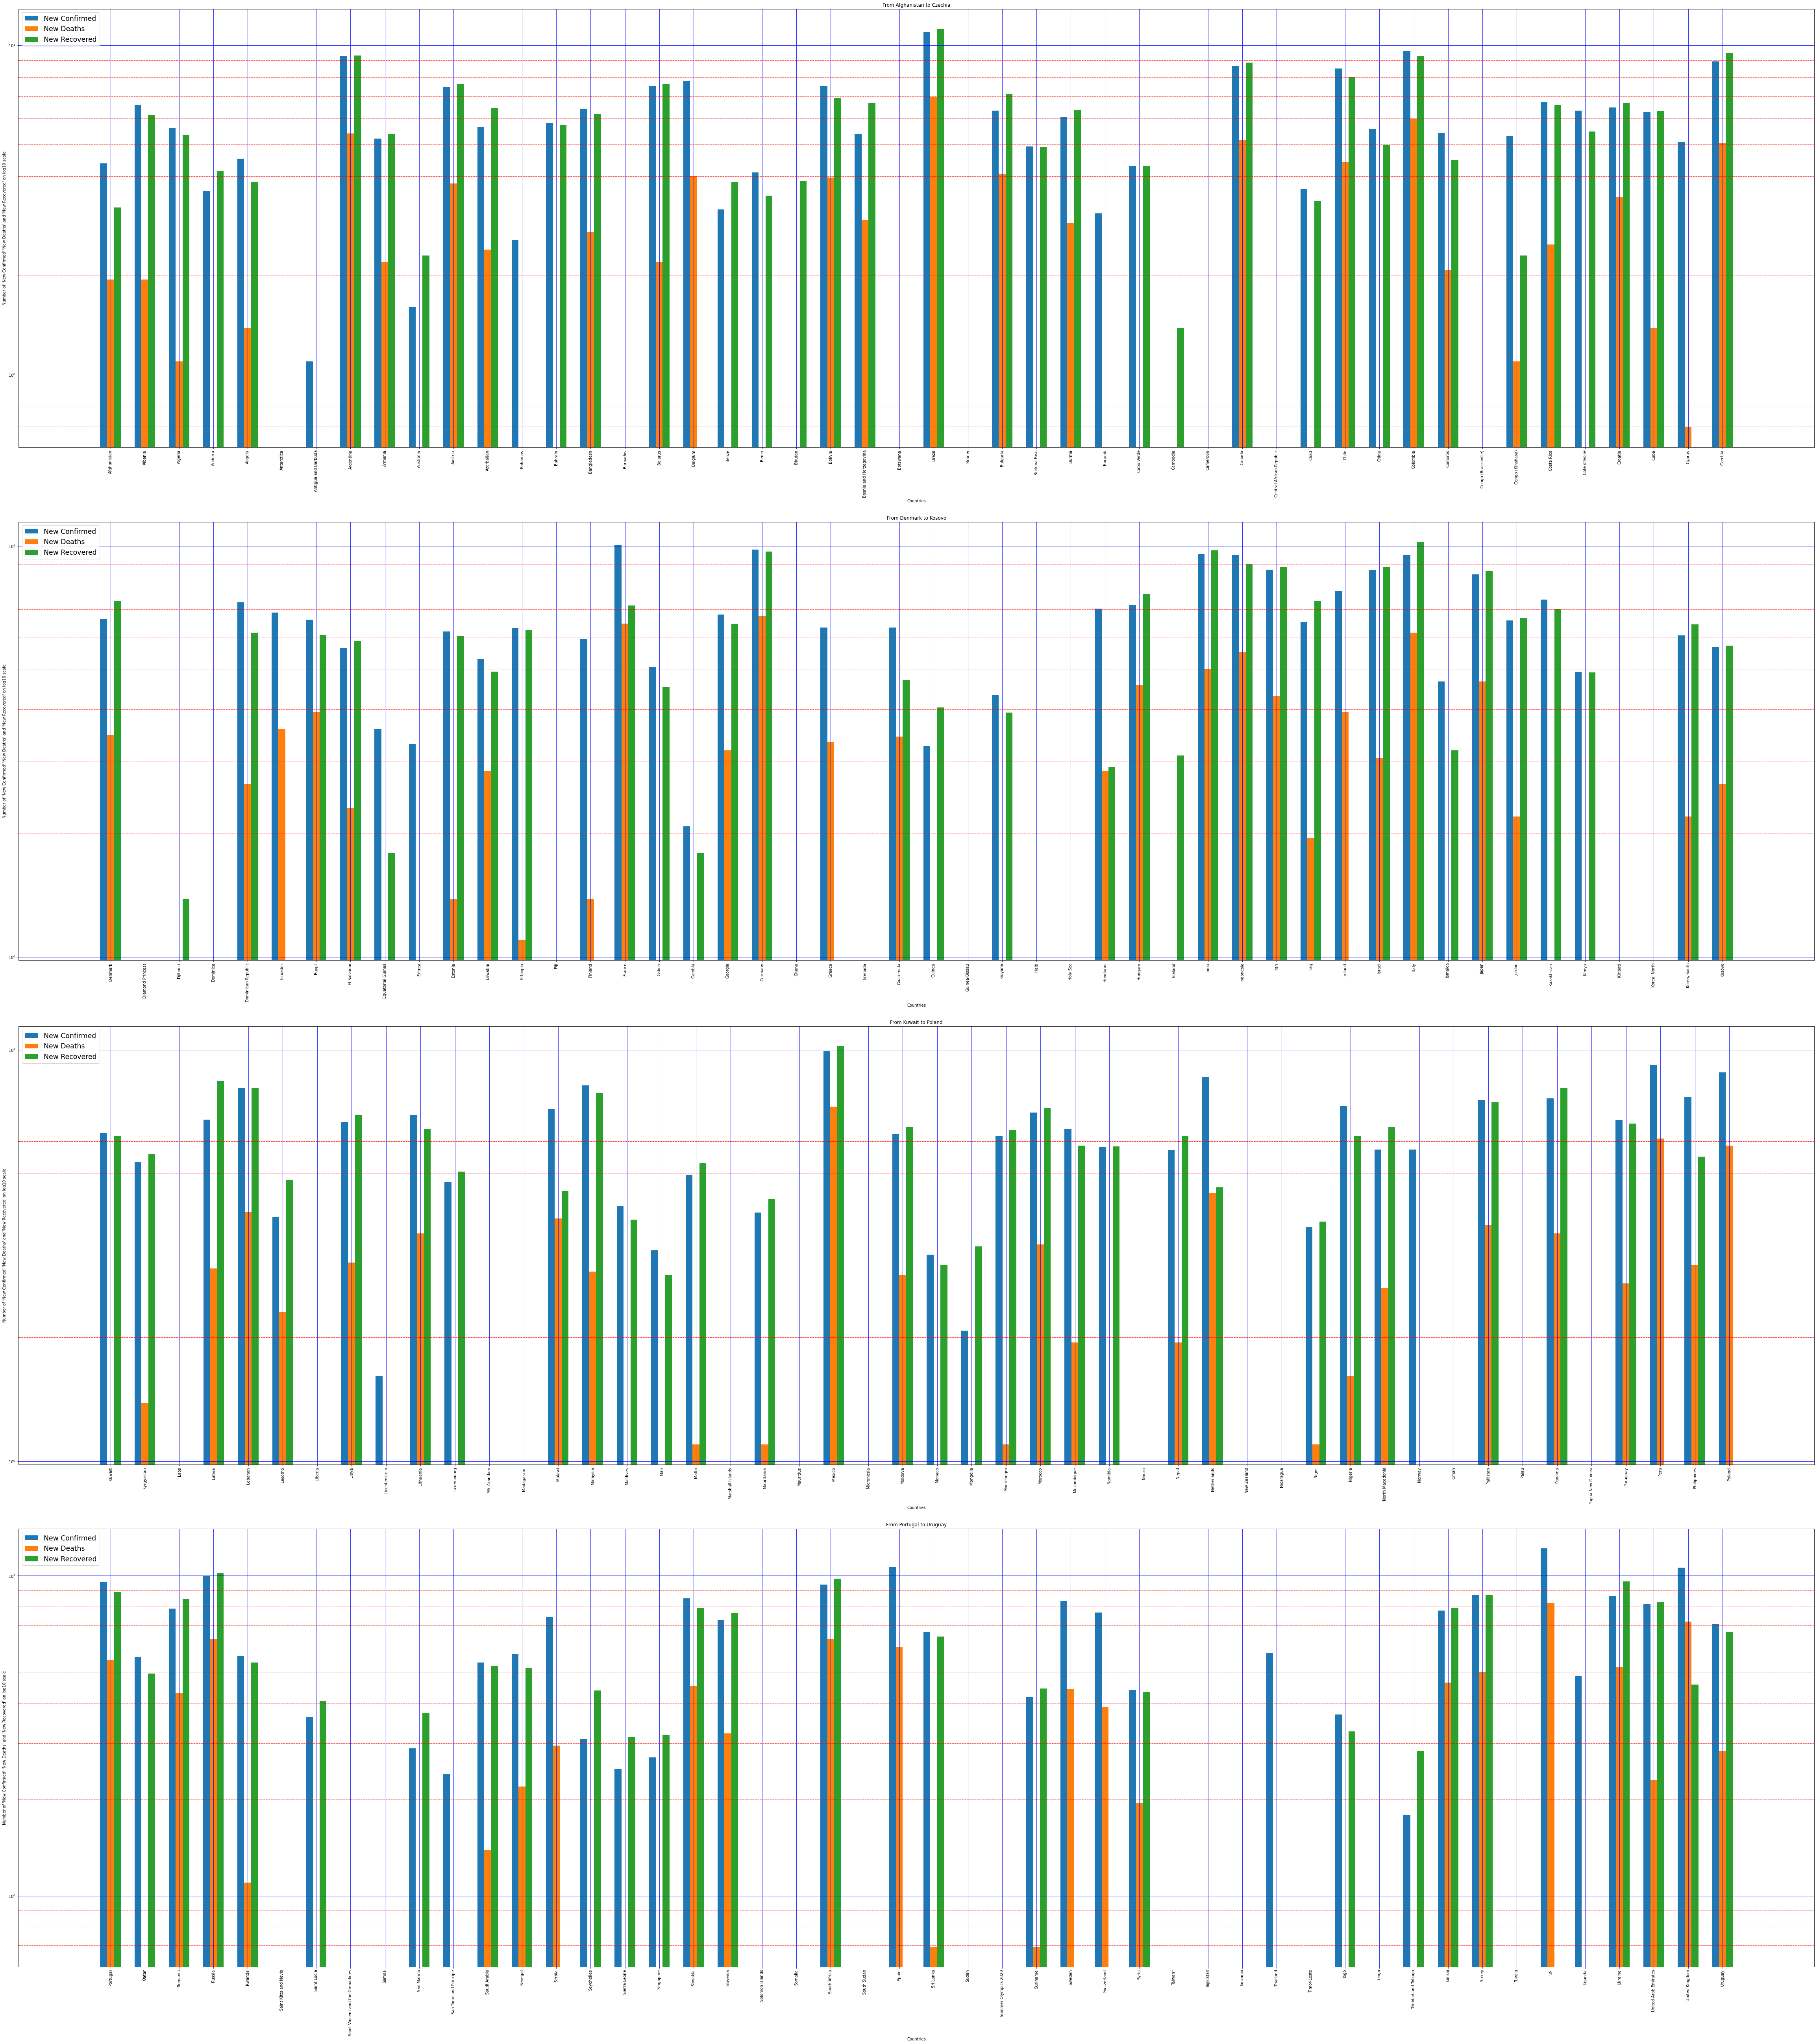

In [ ]:
plot_bar_progress(covid_data, "2021-01-22")